In [2]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm # great progress bar

In [3]:
df = pd.read_csv(r'bank_loans_100k.csv')
df.head(5)

checking_status   duration credit_history purpose  credit_amount  \
0              V0  12.004672             V2      V3    1069.707979   
1              V3  49.594552             V2      V2    3363.626999   
2              V3  16.498608             V2      V3    8146.275518   
3              V1   9.031862             V1      V0     860.689994   
4              V3  12.401648             V4      V2    1390.126876   

  savings_status employment  installment_commitment personal_status  \
0             V0         V2                       4              V2   
1             V0         V2                       4              V2   
2             V0         V1                       1              V1   
3             V0         V4                       4              V1   
4             V3         V4                       1              V2   

  other_parties  ...  property_magnitude        age  other_payment_plans  \
0            V1  ...                  V2  30.587687                 none   
1            V0  ...                  V2  27.943103                 none   
2            V0  ...                  V3  32.209940                 none   
3            V0  ...                  V0  42.614952                 none   
4            V0  ...                  V0  25.142543                 none   

  housing existing_credits  job num_dependents  own_telephone foreign_worker  \
0      V1                1   V2              1            yes            yes   
1      V1                1   V2              1           none            yes   
2      V1                1   V2              1           none            yes   
3      V1                2   V1              1            yes            yes   
4      V1                4   V2              1           none            yes   

  class  
0  good  
1  good  
2  good  
3  good  
4  good  

[5 rows x 21 columns]

In [4]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['age'], name='age'))
fig.add_trace(go.Histogram(x=df['duration'], name='duration'))
fig.update_layout(barmode='overlay', 
                  xaxis_title_text="Value",
                  yaxis_title_text="Count",
                  title="Comparison between age and loan duration"
                  )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['credit_amount'], name='Credit amount'))
fig.update_layout(barmode='overlay', 
                  xaxis_title_text="Value",
                  yaxis_title_text="Count",
                  title="Most frequent amount is between 1.4k-1.6k"
                  )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [6]:
# This graph will ocupy lots of memory space so we should only run it before delivery


# sns.pairplot(df, vars = ['credit_amount', 'employment', 'age'], palette="viridis")
# sns.color_palette("viridis", as_cmap=True)

In [7]:
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(16,16*0.618))
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = "k"
mosaic(df, ['savings_status', 'class'], horizontal=False, ax=ax)
plt.title("Most Individuals have the lowest saving status \n which doesn't qualify them for a loan", {"color":"k"});

In [8]:
sns.catplot(x="employment", y="age", hue="class",
            kind="box", dodge=False, data=df)

Text(0.5, 1.0, 'V3 is the most common')

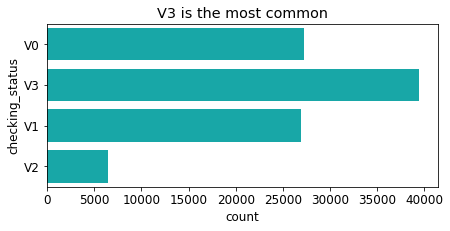

In [9]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="checking_status", data=df, color="c").set_title('V3 is the most common')

In [10]:
# Plotly violin graph, to check distribution (need to reduce dataset size as well otherwise will take forever to run)


# fig = px.violin(df, y="age", x="employment", color="class", box=True, points="all",
#           hover_data=df.columns)
# fig.show()  